# Indice de Végétation
Test de l'indice NDVI (Normalized Difference Vegetation Index) : NDVI = ((IR - R)/(IR + R))

http://desktop.arcgis.com/fr/arcmap/10.3/manage-data/raster-and-images/ndvi-function.htm

In [3]:
import keras

import h5py as h5
import numpy as np

PATH_DATA = 'hackathon_small_data_eightieth.h5'

C:\Users\guillaume\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
f = h5.File(PATH_DATA)

images_total = len(f['S2'][()])

## Exemple pour l'image 0

In [5]:
image_0= np.array(f['S2'][0,:,:,:])
image_0_R= np.array(f['S2'][0,:,:,0])
image_0_G= np.array(f['S2'][0,:,:,1])
image_0_B= np.array(f['S2'][0,:,:,2])
image_0_IR= np.array(f['S2'][0,:,:,3])

In [6]:
label_0 = f['TOP_LANDCOVER'][0][0]
label_0

12.0

In [7]:
NDVI_image_0 = (image_0_IR -image_0_R)/ (image_0_IR +image_0_R)

In [8]:
NDVI_image_0.mean()


0.5816814

In [9]:
import matplotlib.pyplot as plt
plt.imshow(NDVI_image_0, cmap= 'Greens')

## Calcul pour les images

In [10]:
images_R= np.array(f['S2'][:,:,:,0])
images_IR= np.array(f['S2'][:,:,:,3])

In [73]:
NDVI_mean = []
label_test =[]
#NDVI_stddev = []
for i in range(images_total):
    NDVI= (images_IR[i] - images_R[i]) /(images_IR[i] + images_R[i])
    NDVI_tot.append(NDVI.mean())
    label_test.append(f['TOP_LANDCOVER'][()][i][0])
    
#    NDVI_stddev.append(NDVI.std())

C:\Users\guillaume\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


In [69]:
import pandas as pd


2596.1094

In [79]:
f['TOP_LANDCOVER'][()][2][0]

5.0

In [74]:
pd_NDVI_tot = pd.DataFrame(f['TOP_LANDCOVER'][()])
pd_NDVI_tot['label'] = pd.DataFrame(f['TOP_LANDCOVER'][()])
pd_NDVI_tot['mean_NDVI'] = pd.DataFrame(NDVI_tot)
#pd_NDVI_tot['std_NDVI'] = pd.DataFrame(NDVI_stddev)
pd_NDVI_tot = pd_NDVI_tot.drop(0,1)
pd_NDVI_tot.head()


,label,mean_NDVI
0,12.0,0.581681
1,12.0,0.460823
2,5.0,0.454870
3,5.0,0.495072
4,2.0,0.526492


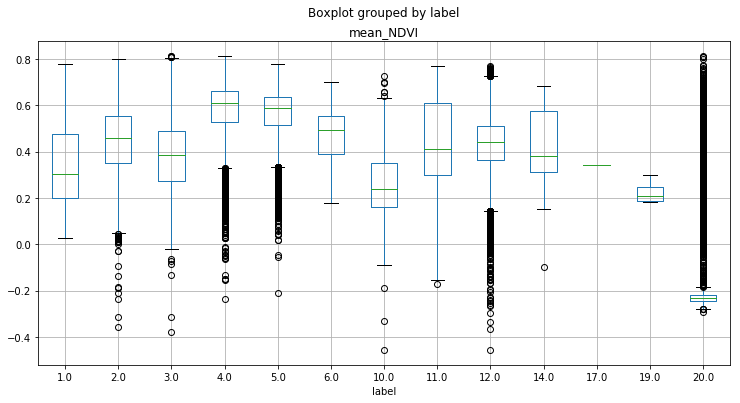

In [75]:
pd_NDVI_tot.boxplot(column='mean_NDVI', by = 'label', figsize=(12,6))

# Test rapports couleurs

In [76]:
images_R= np.array(f['S2'][:,:,:,0])
images_G= np.array(f['S2'][:,:,:,1])
images_B= np.array(f['S2'][:,:,:,2])
images_IR= np.array(f['S2'][:,:,:,3])

In [ ]:
RonG = []
BonG = []
BonR = []

for i in range(images_total):
    NDVI= (images_IR[i] - images_R[i]) /(images_IR[i] + images_R[i])
    NDVI_tot.append(NDVI.mean())
    label_test.append(f['TOP_LANDCOVER'][()][i][0])